Aplicando modelo Naive Bayes para determinar se um Cliente decidiu comprar um produto ou não, baseado em certas variáveis

Dataset obtido no Kaggle ([https://www.kaggle.com/datasets/denisadutca/customer-behaviour](https://www.kaggle.com/datasets/denisadutca/customer-behaviour))

In [19]:
# Conjunto de Importações
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dados = pd.read_csv('data/d3-customer_data.csv')           # lendo o .csv

In [21]:
dados.head()            # vendo o cabeçalho do .csvv

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
colunas = dados.columns         # atribuição das colunas a uma variável

In [23]:
colunas = colunas.drop(['User ID'])            # dropando a coluna "User ID", para facilitar a convergência do modelo
colunas                                        # mostrando colunas restantes ('Gender', 'Age', 'EstimatedSalary', 'Purchased')

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [24]:
dados.isna().sum()          # contagem de NaN's no .csv

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Normalizando os dados

In [25]:
from sklearn.preprocessing import MinMaxScaler          # importação do sklearn para usar MinMax

In [26]:
normalizador = MinMaxScaler(feature_range=(0,1))            # função MinMax para criação de um normalizador

In [27]:
# Normalização dos valores para entre -1 e 1

colunas_para_normalizar = ['Age','EstimatedSalary']

for col in colunas_para_normalizar:
    dados[col] = normalizador.fit_transform(dados[col].values.reshape(-1, 1))

In [28]:
dados.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,0.023810,0.029630,0
1,15810944,Male,0.404762,0.037037,0
2,15668575,Female,0.190476,0.207407,0
3,15603246,Female,0.214286,0.311111,0
4,15804002,Male,0.023810,0.451852,0


Convertendo a variável categórica Gender para numérica

In [32]:
from sklearn.preprocessing import LabelEncoder, label_binarize          # Importação do sklearn para transformação da variável (encoding)

In [33]:
encoder = LabelEncoder()           # chamando método LabelEncoder()

In [36]:
dados['Gender'] = encoder.fit_transform(dados['Gender'])            # tranformação de STR para NUM

In [37]:
dados.head()            # cabeçalho do .csv (Gender agora foi normalizado) ------> Male : 1 ; Female : 0

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,0.023810,0.029630,0
1,15810944,1,0.404762,0.037037,0
2,15668575,0,0.190476,0.207407,0
3,15603246,0,0.214286,0.311111,0
4,15804002,1,0.023810,0.451852,0


Separando em amostra de treino e teste

In [38]:
from sklearn.model_selection import train_test_split            # importação do "train_test_split" do sklearn para realizar o treinamento

In [39]:
# Atribuindo valores para X e Y
X = dados[['Gender', 'Age', 'EstimatedSalary']].values  # ('Purchased' é a coluna alvo)
Y = dados['Purchased'].values  # Variável alvo

In [40]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.30,random_state=0)           # separação de 30% para teste e 70% para treino

Aplicando modelo Naive-Bayes (Gaussiano; Bernoulli e Multinomial)

In [41]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB           # importação do sklearn para utilização dos modelos

## Modelo Gaussiano

In [42]:
modelo_gaussiano = GaussianNB()          # modelo gaussiano (Naive Bayes)

In [43]:
modelo_gaussiano.fit(X_treino,Y_treino)          # treinamento do modelo com dados de treino

GaussianNB()

Realizando previsões na amostra de teste

In [44]:
Y_previsto = modelo_gaussiano.predict(X_teste)           # realização de previsões com a amostra de teste

Gerando matriz de confusão

In [45]:
from sklearn.metrics import confusion_matrix            # importação do "confusion_matrix" do Sklearn para gerar a matriz de confusão

In [46]:
confusion_matrix_gaussiano = confusion_matrix(Y_teste,Y_previsto)            # Utilização do método confusion_matrix(), com os dados de teste e dados previstos

<Axes: >

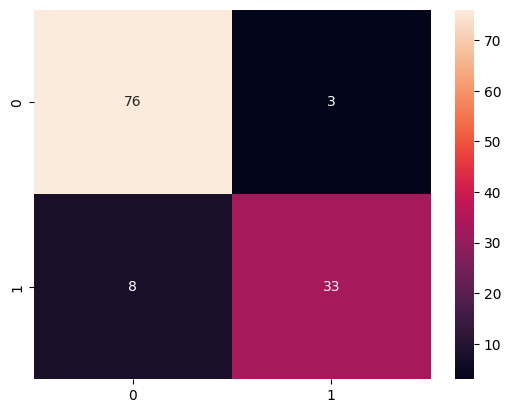

In [47]:
sns.heatmap(confusion_matrix_gaussiano,annot=True, fmt="d")            # criação do heatmap

In [48]:
modelo_gaussiano.score(X_treino,Y_treino)            # Score do modelo no treino -> 88%

0.8892857142857142

In [49]:
modelo_gaussiano.score(X_teste,Y_teste)          # score do modelo no teste -> 90%

0.9083333333333333

## MODELO BERNOULLI

In [50]:
modelo_bernoulli = BernoulliNB()         # modelo Bernoulli (Naive Bayes)

In [51]:
modelo_bernoulli.fit(X_treino,Y_treino)          # treinamento do modelo com dados de treino 

BernoulliNB()

In [52]:
Y_previsto2 = modelo_bernoulli.predict(X_teste)          # realização de previsões com a amostra de teste

In [53]:
confusion_matrix_bernoulli = confusion_matrix(Y_teste,Y_previsto2)           # Utilização do método confusion_matrix(), com os dados de teste e dados previstos

<Axes: >

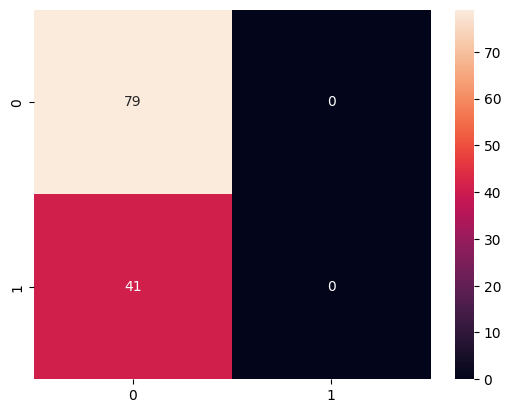

In [54]:
sns.heatmap(confusion_matrix_bernoulli,annot=True, fmt="d")            # criação do heatmap

In [56]:
modelo_bernoulli.score(X_treino,Y_treino)            # Score do modelo no treino -> 63%

0.6357142857142857

In [57]:
modelo_bernoulli.score(X_teste,Y_teste)          # Score do modelo no teste -> 65%

0.6583333333333333

## MODELO MULTINOMIAL

In [58]:
modelo_multinomial = MultinomialNB()            # modelo Multinomial (Naive Bayes)

In [59]:
modelo_multinomial.fit(X_treino,Y_treino)          # treinamento do modelo com dados de treino

MultinomialNB()

In [60]:
Y_previsto2 = modelo_multinomial.predict(X_teste)          # realização de previsões com a amostra de teste

In [61]:
confusion_matrix_multinomial = confusion_matrix(Y_teste,Y_previsto2)           # Utilização do método confusion_matrix(), com os dados de teste e dados previstos

<Axes: >

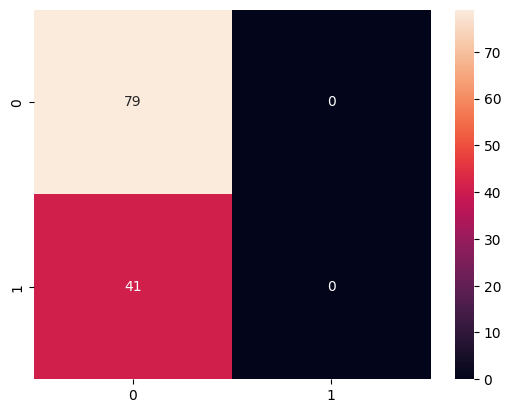

In [62]:
sns.heatmap(confusion_matrix_bernoulli,annot=True, fmt="d")            # criação do heatmap

In [63]:
modelo_multinomial.score(X_treino,Y_treino)            # Score do modelo no treino -> 63%

0.6357142857142857

In [64]:
modelo_multinomial.score(X_teste,Y_teste)          # Score do modelo no teste -> 65%

0.6583333333333333

In [68]:
'''
EX: Fazer uma predição pelo modelo gaussiano:
'''
print(modelo_gaussiano.predict([[1, 0.53, 0.3111]]))            # usar numeros entre 0 e 1

[0]


### RESULTADOS:

- Naive Bayes Gaussiano     -> 90%
- Naive Bayes Bernoulli     -> 65%
- Naive Bayes Multinomial   -> 65%